In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [148]:
# データセットのパラメータ
t_points = 1000
t = np.linspace(0, 10, t_points)
y = np.sin(t)

num_samples =15
random_indices = np.random.choice(t_points, num_samples, replace=False)
# 対応するデータ点を取得
random_samples = t[random_indices]
random_samples_y = np.sin(random_samples)


# データをTensorに変換
t_tensor = torch.tensor(t, dtype=torch.float32, requires_grad=True).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32, requires_grad=True).view(-1, 1)

random_samples_y_tensor = torch.tensor(random_samples_y, dtype=torch.float32, requires_grad=True).view(-1, 1)
random_samples_tensor = torch.tensor(random_samples, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [149]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 8),
            nn.Tanh(),
            nn.Linear(8, 8),
            nn.Tanh(),
            nn.Linear(8, 1)
        )
    
    def forward(self, x):
        return self.fc(x)


In [150]:
def physics_informed_loss(model_output, t):
    y = model_output
    # 1階微分
    dy_dt = torch.autograd.grad(y.sum(), t, create_graph=True)[0]
    # 2階微分
    d2y_dt2 = torch.autograd.grad(dy_dt.sum(), t, create_graph=True)[0]
    
    # 単振動の方程式
    
    loss = (d2y_dt2 + y).pow(2).mean()
    return loss

In [151]:
# 訓練ループ
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(random_samples_tensor)
    mse_loss = criterion(y_pred, random_samples_y_tensor)
    phys_loss = physics_informed_loss(y_pred, random_samples_tensor)
    
    # 合成損失
    loss = mse_loss + phys_loss
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {mse_loss.item():.4f}, Physics Loss: {phys_loss.item():.4f}')


Epoch [100/1000], MSE Loss: 0.2236, Physics Loss: 0.0308
Epoch [200/1000], MSE Loss: 0.0543, Physics Loss: 0.0391
Epoch [300/1000], MSE Loss: 0.0176, Physics Loss: 0.0126
Epoch [400/1000], MSE Loss: 0.0024, Physics Loss: 0.0030
Epoch [500/1000], MSE Loss: 0.0001, Physics Loss: 0.0003
Epoch [600/1000], MSE Loss: 0.0003, Physics Loss: 0.0003
Epoch [700/1000], MSE Loss: 0.0001, Physics Loss: 0.0000
Epoch [800/1000], MSE Loss: 0.0000, Physics Loss: 0.0000
Epoch [900/1000], MSE Loss: 0.0000, Physics Loss: 0.0000
Epoch [1000/1000], MSE Loss: 0.0034, Physics Loss: 0.0026


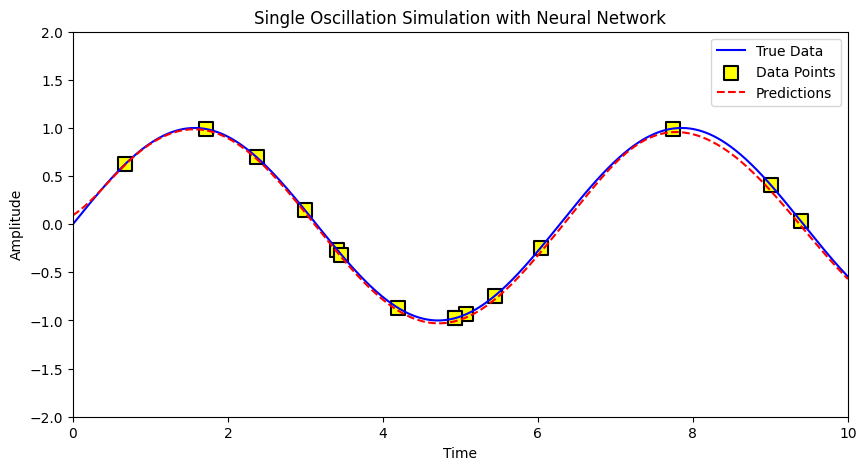

In [152]:
plt.figure(figsize=(10, 5))


plt.plot(t, y, label='True Data', color='blue')
plt.scatter(random_samples, random_samples_y, label='Data Points', color='yellow', s=100, marker='s', edgecolor='black', linewidths=1.5)
plt.plot(t, model(t_tensor).detach().numpy(), label='Predictions', color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Single Oscillation Simulation with Neural Network')
plt.show()

In [153]:
# 訓練ループ
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(random_samples_tensor)
    mse_loss = criterion(y_pred, random_samples_y_tensor)
    phys_loss = physics_informed_loss(y_pred, random_samples_tensor)
    
    # 合成損失
    loss = mse_loss 
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {mse_loss.item():.4f}, Physics Loss: {phys_loss.item():.4f}')

Epoch [100/1000], MSE Loss: 0.1090, Physics Loss: 0.0987
Epoch [200/1000], MSE Loss: 0.0583, Physics Loss: 0.1279
Epoch [300/1000], MSE Loss: 0.0481, Physics Loss: 0.1276
Epoch [400/1000], MSE Loss: 0.0370, Physics Loss: 0.1339
Epoch [500/1000], MSE Loss: 0.0070, Physics Loss: 0.0708
Epoch [600/1000], MSE Loss: 0.0008, Physics Loss: 0.1317
Epoch [700/1000], MSE Loss: 0.0005, Physics Loss: 0.1331
Epoch [800/1000], MSE Loss: 0.0003, Physics Loss: 0.1395
Epoch [900/1000], MSE Loss: 0.0002, Physics Loss: 0.1436
Epoch [1000/1000], MSE Loss: 0.0001, Physics Loss: 0.1452


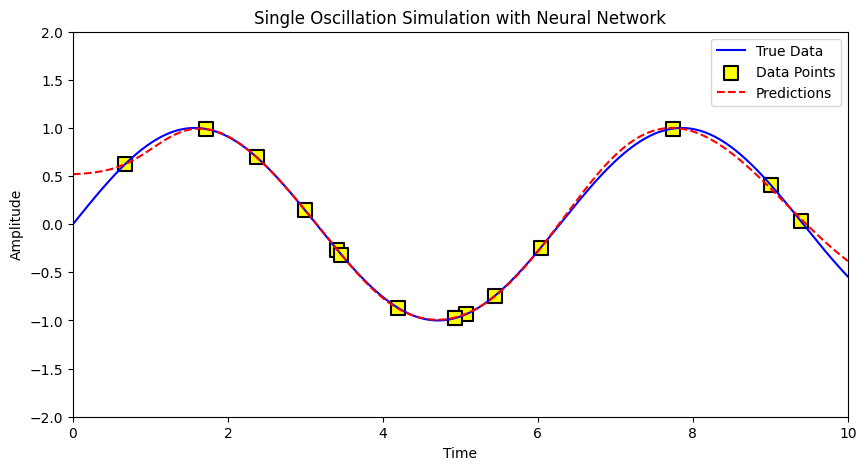

In [154]:
plt.figure(figsize=(10, 5))


plt.plot(t, y, label='True Data', color='blue')
plt.scatter(random_samples, random_samples_y, label='Data Points', color='yellow', s=100, marker='s', edgecolor='black', linewidths=1.5)
plt.plot(t, model(t_tensor).detach().numpy(), label='Predictions', color='red', linestyle='--')
plt.xlim(0,10)
plt.ylim(-2,2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Single Oscillation Simulation with Neural Network')
plt.show()